In [41]:
from sklearn.datasets import load_iris 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sc
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 

In [18]:
iris= load_iris()
data = pd.DataFrame(iris.data,columns=iris.feature_names)

In [19]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## DATA processing 
1) about standard scaler : <br />
    It transforms the data to the mean of 0 and std deviation of 1 <br />
    It is the need of most machine learning models
2) about PCA : <br />
   It Converts the 4 data points to 2 data points 
   

In [20]:
scaler = StandardScaler()
pca = PCA(n_components=2)

In [21]:
x_ = scaler.fit_transform(data)
x =  pca.fit_transform(x_)

In [27]:
print(x_.shape)
print(x.shape)

(150, 4)
(150, 2)


In [22]:
x_[0]

array([-0.90068117,  1.01900435, -1.34022653, -1.3154443 ])

In [23]:
x[0]

array([-2.26470281,  0.4800266 ])

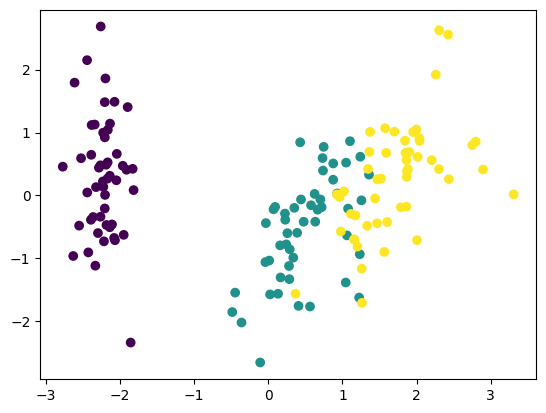

In [28]:
plt.scatter(x[:,0],x[:,1],c=iris.target)

## Below Explanation 
In dendogram :  <br />
method 'ward' means use 'euclidean' distance <br />
Choose n_clusters by the longest vertical line to which no other Horizontal line passes  

Text(0, 0.5, 'Euclidean Distance ')

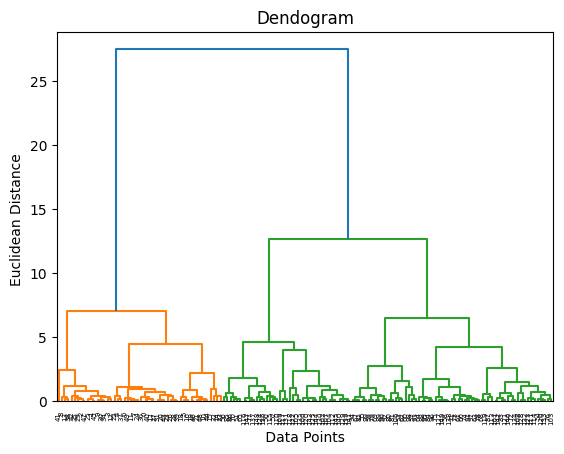

In [31]:
sc.dendrogram(sc.linkage(x,method='ward'))
plt.title("Dendogram")
plt.xlabel(" Data Points ")
plt.ylabel("Euclidean Distance ")

In [47]:
model = AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')
model.fit(x)

AgglomerativeClustering()

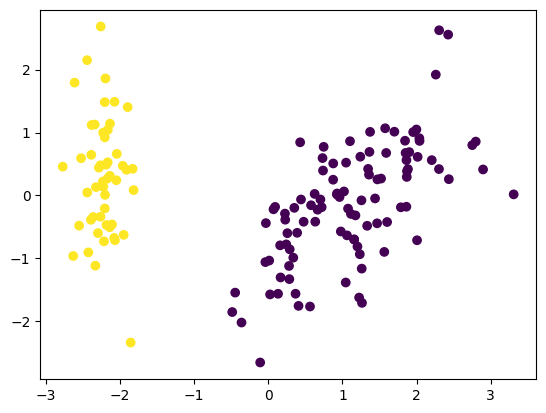

In [48]:
plt.scatter(x[:,0],x[:,1],c=model.labels_)

In [49]:
silhouette_coeff  = []
for k in range(2,11):
    model = AgglomerativeClustering(n_clusters=k,metric='euclidean',linkage='ward')
    model.fit(x)
    score = silhouette_score(x,model.labels_)
    silhouette_coeff.append(score)
    

In [50]:
silhouette_coeff

[0.6145202036230452,
 0.511059598876619,
 0.4487350420958893,
 0.4041689631006267,
 0.3672112889583074,
 0.3706820678912666,
 0.3930552606912111,
 0.4183694466469872,
 0.405420562888949]

Text(0, 0.5, 'Silhouette score')

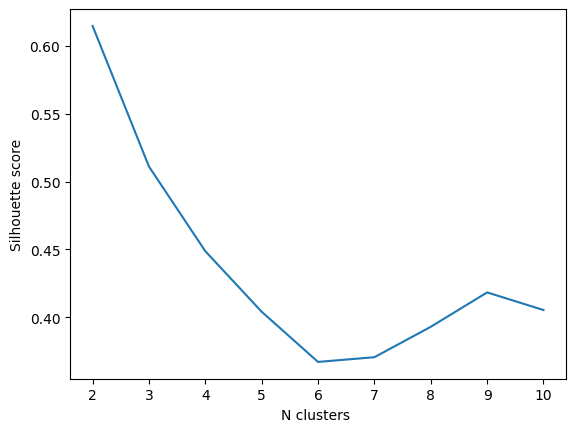

In [51]:
plt.plot(range(2,11),silhouette_coeff)
plt.xticks(range(2,11))
plt.xlabel("N clusters ")
plt.ylabel("Silhouette score")
